In [209]:
#Adapted from https://towardsdatascience.com/topic-modeling-with-nlp-on-amazon-reviews-an-application-of-latent-dirichlet-allocation-lda-ae42a4c8b369
#https://blog.insightdatascience.com/topic-modeling-and-sentiment-analysis-to-pinpoint-the-perfect-doctor-6a8fdd4a3904
import pandas as pd
import numpy as np

In [504]:
camera_products = ["NestOutdoorCam","NestMini","NestIndoorCam",
                   "WyzeCamPan","NanitPlus","ArloPro",
                   "RingStickUpCam","RingSpotlightCam","RingIndoorCam","RingFloodlightCam"]
doorbell_products = ["RingVideoDoorbell","NestVideoDoorbell"]
voice_assistant_products = ["GoogleHomeMini","NestMini",
                            "Homepod",
                            "EchoFlex","EchoDot"]
videocall_products = ["EchoShow","EchoStudio",
                     "NestHubMax","FacebookPortal"]
other_products = ["NestWifi","NestThermostat"]

privacy_keywords = ["privacy", "permission", "surveillance",
                    "advertisement","ads","confidential",
                    "monitor","intrusion","spy","confidential",
                   "private"]

security_keywords = ["security","protection","safety","safe",
                     "threat","targeted","secure","virus", "spyware", 
                     "malware","firewall","breach","exploit","bot"]

creepy_keywords = ["creepy", "scary", "unusual","invasive",
                   "uncomfortable","violate","aware","unaware",
                  "spooky", "creep", "spy"]

data_keywords = ["data", "collection", "tos", "third-party",
                 "terms", "delete","save","policy","agree",
                 "agreement","consent","storage","information"]

In [505]:
df = pd.read_csv("all_reviews.csv",dtype={'version': 'string'})
df.fillna("N/A", inplace=True)
df.head()

,source,product,version,date,verified,rating,content,title,PS,privacy,security,creepy,data,camera,doorbell,voice,videocall,other,gift,people
0,AMZ,NestOutdoorCam,N/A,20 Aug 2019,1,1.0,"Of course, now that Google has purchased Nest,...",Google overreach,0,0,0,0,0,1,0,0,0,0,0,0
1,AMZ,NestOutdoorCam,N/A,01 Sep 2019,1,1.0,Get a different brand. We have had this for 2 ...,Had for 2 Years: Terrible Long-Term Quality & ...,1,0,1,0,0,1,0,0,0,0,0,0
2,AMZ,NestOutdoorCam,N/A,15 Feb 2020,1,1.0,Purchased another camera for my home that was ...,AWFUL Customer support !!,0,0,0,0,0,1,0,0,0,0,0,0
3,AMZ,NestOutdoorCam,N/A,28 Nov 2017,1,2.0,This is probably my most regretted investment ...,"I wanted to love this, But became Aware (pun i...",1,0,1,1,1,1,0,0,0,0,0,0
4,AMZ,NestOutdoorCam,N/A,02 Aug 2020,1,1.0,I had 2 of the 4 cameras that I bought install...,Returned product- Here is why.,1,1,0,1,0,1,0,0,0,0,0,0


In [506]:
df.shape

(125813, 20)

In [507]:
#df_good_reviews= df.loc[(df.people == 1) & ((df.PS == 1)|(df.privacy == 1)|(df.security == 1)|(df.creepy == 1)|(df.data == 1))]#[0:10000]
df_good_reviews= df.loc[(df.creepy == 1)]#[0:10000]
df_good_reviews.shape

(1376, 20)

In [508]:
# Create document-term matrix
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
data_cv = cv.fit_transform(df_good_reviews.content)

In [509]:
data_cv.shape

(1376, 8527)

In [510]:
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = df_good_reviews.index

In [511]:
# Pickle it for later use
#import pickle
#pickle.dump(cv, open("cv_stop.pkl", "wb"))
#data_stop.to_pickle("dtm_stop.pkl")

In [512]:
# Let's read in our document-term matrix
import pandas as pd
import pickle

#data = pd.read_pickle('dtm_stop.pkl')
data = data_stop
data

,00,000,00pm,01,02,04,07,08,10,100,...,zealand,zero,zigbee,zilch,zmodo,zone,zones,zoom,zoomed,zooming
3,0,0,0,0,0,0,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124477,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124601,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124692,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
125438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [513]:
# Import the necessary modules for LDA with gensim
# Terminal / Anaconda Navigator: conda install -c conda-forge gensim
from gensim import matutils, models
import scipy.sparse

# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [514]:
# One of the required inputs is a term-document matrix
tdm = data.transpose()
tdm.head()

,3,4,8,10,12,14,18,20,21,22,...,123692,123956,124141,124271,124291,124477,124601,124692,125438,125518
00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00pm,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
01,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [515]:
# We're going to put the term-document matrix into a new gensim format, from df --> sparse matrix --> gensim corpus
sparse_counts = scipy.sparse.csr_matrix(tdm)
corpus = matutils.Sparse2Corpus(sparse_counts)

In [516]:
# Gensim also requires dictionary of the all terms and their respective location in the term-document matrix
#cv = pickle.load(open("cv_stop.pkl", "rb"))
id2word = dict((v, k) for k, v in cv.vocabulary_.items())

In [517]:
# Now that we have the corpus (term-document matrix) and id2word (dictionary of location: term),
# we need to specify two other parameters as well - the number of topics and the number of passes
"""
lda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=30)
lda.print_topics()
"""

'\nlda = models.LdaModel(corpus=corpus, id2word=id2word, num_topics=5, passes=30)\nlda.print_topics()\n'

In [518]:
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
import string
from nltk import word_tokenize, pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kavyakopparapu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/kavyakopparapu/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [519]:
# Let's create a function to pull out nouns from a string of text
from nltk import word_tokenize, pos_tag

def nouns(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_noun = lambda pos: pos[:2] == 'NN'
    tokenized = word_tokenize(text)
    all_nouns = [word for (word, pos) in pos_tag(tokenized) if is_noun(pos)] 
    return ' '.join(all_nouns)

In [520]:
data_nouns = pd.DataFrame(df_good_reviews.content.apply(nouns))
data_nouns

,content
3,investment time % subscription service AFTER p...
4,cameras house days week end night vision end d...
8,product quality product Google Nest years Augu...
10,VERY period item review day Nest Aware trial p...
12,WARNING GOOGLE/NEST change status light camera...
...,...
124477,day officer door ma ’ house night clue guy car...
124601,Ring camera connectivity issues company signal...
124692,flood location soffit mount unit order lights ...
125438,things sofet Had bracket


In [521]:
# Create a new document-term matrix using only nouns
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer

# Re-add the additional stop words since we are recreating the document-term matrix
add_stop_words = ['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people',
                  'youre', 'got', 'gonna', 'time', 'think', 'yeah', 'said']
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)


# Recreate a document-term matrix with only nouns
cvn = CountVectorizer(stop_words=stop_words)
data_cvn = cvn.fit_transform(data_nouns.content)
data_dtmn = pd.DataFrame(data_cvn.toarray(), columns=cvn.get_feature_names())
data_dtmn.index = data_nouns.index

# Create the gensim corpus
corpusn = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmn.transpose()))

# Create the vocabulary dictionary
id2wordn = dict((v, k) for k, v in cvn.vocabulary_.items())

In [527]:
# Let's try topics = 3
ldan = models.LdaModel(corpus=corpusn, num_topics=10, id2word=id2wordn, passes=30)
ldan.print_topics()

[(0,
  '0.035*"support" + 0.020*"issue" + 0.016*"customer" + 0.016*"problem" + 0.014*"camera" + 0.014*"nest" + 0.014*"device" + 0.013*"service" + 0.012*"issues" + 0.011*"thermostat"'),
 (1,
  '0.015*"amazon" + 0.014*"tv" + 0.010*"studios" + 0.010*"cube" + 0.008*"garage" + 0.008*"things" + 0.008*"group" + 0.008*"sub" + 0.007*"sound" + 0.007*"units"'),
 (2,
  '0.017*"motion" + 0.013*"camera" + 0.012*"blink" + 0.012*"room" + 0.011*"clock" + 0.009*"way" + 0.007*"gen" + 0.006*"dog" + 0.006*"product" + 0.006*"living"'),
 (3,
  '0.051*"camera" + 0.023*"night" + 0.019*"quality" + 0.016*"motion" + 0.015*"video" + 0.013*"alerts" + 0.012*"vision" + 0.012*"app" + 0.011*"cam" + 0.011*"subscription"'),
 (4,
  '0.052*"alexa" + 0.034*"music" + 0.027*"echo" + 0.023*"speaker" + 0.021*"amazon" + 0.021*"device" + 0.021*"sound" + 0.015*"dot" + 0.015*"voice" + 0.014*"home"'),
 (5,
  '0.023*"alexa" + 0.017*"home" + 0.016*"amazon" + 0.016*"app" + 0.016*"echo" + 0.015*"phone" + 0.013*"google" + 0.008*"devices"

In [523]:
# Let's create a function to pull out nouns from a string of text
def nouns_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns and adjectives.'''
    is_noun_adj = lambda pos: pos[:2] == 'NN' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    nouns_adj = [word for (word, pos) in pos_tag(tokenized) if is_noun_adj(pos)] 
    return ' '.join(nouns_adj)

data_nouns_adj = pd.DataFrame(df_good_reviews.content.apply(nouns_adj))
data_nouns_adj

,content
3,regretted investment long time ignorant % usef...
4,cameras house first few days second week great...
8,product quality product Google Nest few years ...
10,Good first terrible VERY return/trial period i...
12,WARNING GOOGLE/NEST change status light camera...
...,...
124477,day police officer door sorry ma ’ house last ...
124601,first Ring camera internet connectivity issues...
124692,flood light location soffit mount unit order l...
125438,things little weird sofet Had bracket little b...


In [524]:
# Create a new document-term matrix using only nouns and adjectives, also remove common words with max_df
cvna = CountVectorizer(max_df=.8) #, max_df is used for removing data values that appear too frequently, also known as "corpus-specific stop words". 
# For example, max_df=.8 means "It ignores terms that appear in more than 80% of the documents". 
data_cvna = cvna.fit_transform(data_nouns_adj.content)
data_dtmna = pd.DataFrame(data_cvna.toarray(), columns=cvna.get_feature_names())
data_dtmna.index = data_nouns_adj.index

# Create the gensim corpus
corpusna = matutils.Sparse2Corpus(scipy.sparse.csr_matrix(data_dtmna.transpose()))

# Create the vocabulary dictionary
id2wordna = dict((v, k) for k, v in cvna.vocabulary_.items())

In [528]:
# Let's try 4 topics
ldana = models.LdaModel(corpus=corpusna, num_topics=10, id2word=id2wordna, passes=30)
ldana.print_topics()

[(0,
  '0.014*"cameras" + 0.013*"camera" + 0.012*"wifi" + 0.009*"google" + 0.006*"network" + 0.005*"time" + 0.005*"device" + 0.005*"amazon" + 0.004*"light" + 0.004*"same"'),
 (1,
  '0.019*"camera" + 0.014*"other" + 0.013*"night" + 0.013*"cam" + 0.012*"baby" + 0.012*"room" + 0.011*"app" + 0.010*"nest" + 0.009*"vision" + 0.008*"light"'),
 (2,
  '0.011*"chime" + 0.010*"ring" + 0.009*"show" + 0.008*"video" + 0.008*"new" + 0.007*"problem" + 0.007*"pro" + 0.007*"easy" + 0.007*"day" + 0.006*"wifi"'),
 (3,
  '0.038*"alexa" + 0.026*"echo" + 0.022*"music" + 0.018*"amazon" + 0.016*"sound" + 0.014*"speaker" + 0.013*"device" + 0.010*"weird" + 0.010*"great" + 0.010*"dot"'),
 (4,
  '0.036*"camera" + 0.012*"cam" + 0.011*"motion" + 0.010*"time" + 0.009*"app" + 0.008*"aware" + 0.008*"front" + 0.008*"quality" + 0.008*"house" + 0.006*"nest"'),
 (5,
  '0.015*"app" + 0.011*"support" + 0.010*"camera" + 0.009*"time" + 0.008*"phone" + 0.008*"problem" + 0.007*"other" + 0.007*"issues" + 0.007*"devices" + 0.006*"

In [658]:
#Adding LDA
# Using readlines() 
import re 

lda_file = open('LDA.txt', 'r') 
lines = lda_file.readlines() 

topic = ""
subject = ""
arr = {}
for l in lines:
    if("#" in l):
        if(l.count("#") == 2):
            subject = l.split("#")[-1].strip()
        else:
            topic = l.split("#")[-1].strip()
    else:
        arr[topic+"-"+subject] = l.split("+")

LDA_words = []
keys = list(arr.keys())

print(keys)
LDA_word_set = set()

for i in range(len(keys)):
    LDA_words.append([])
    for j in range(len(arr[keys[i]])):
        LDA_words[i].append([0.0,""])
        s = arr[keys[i]][j].split("*")
        if(len(s[0]) > 1):
            LDA_words[i][j][0] = float(s[0][1:])
            LDA_words[i][j][1] = s[1][1:len(s[1])-2]
            LDA_word_set.add(LDA_words[i][j][1])
#print(LDA_words)

['PRIVACY-Convenience: Easy, Great, Setup, Home', 'PRIVACY-Convenience: Quality, Video, App', 'PRIVACY-Convenience: Google, Nest, Temperature, Easy, App', 'PRIVACY-Family: Nanit, Monitor, Sleep, Parents', 'PRIVACY-Family: Google, Wyze, Cameras, Home', 'PRIVACY-Advertisement: Screen, Video, Echo, Amazon, Alexa', 'PRIVACY-Advertisement: Alexa, Music, Dot Speaker', 'PRIVACY-Advertisement: Home, Scary, Time, Children', 'PRIVACY-Music: Alexa, Amazon, Echo, Device', 'PRIVACY-Music: Apple, Siri, Homepod, Room, Price', 'SECURITY-Security Cameras: Camera, Arlo, Video, Nest', 'SECURITY-Home environment: Ring, Doorbell, Door, Front, House', 'SECURITY-Locational safety: Motion, Detection, Alerts, Driveway, Zones', 'CREEPY-Personal Space: Home, Room, Night, Light', 'DATA-Data Saving: App, Save, Access, Recordings, Feed, Servers', 'DATA-Data Saving: Cam, Aware, Data, Google, History', 'DATA-Data Saving: Camera, Storage, Cloud, Quality, Good', 'DATA-Data Security: Camera, Storrage, Nest, Motion', 'DA

In [659]:
print(len(LDA_words), len(LDA_words[0]), len(LDA_words[0][0]))
print(len(LDA_word_set))

28 10 2
123


In [660]:
threshold = 0.5
all_review_scores = []
LDA_reviews = {}

for k in keys:
    LDA_reviews[k] = []

for ind in df.index: 
    s = df['content'][ind]
    all_review_scores.append(df['rating'][ind])
    word_dict = {}
    for word in LDA_word_set:
        word_dict[word] = s.count(word)
    for k in range(len(keys)):
        score = 0
        for i in LDA_words[k]:
            score += i[0]*word_dict[i[1]]
        if(score > threshold):
            LDA_reviews[keys[k]].append(ind)
average_review_score = average_review_score / len(df.index)


pickle.dump(LDA_reviews, open('LDA_indexes', 'wb'))

In [661]:
import seaborn as sns
import statistics
rating_arr = {}
for k in keys:
    rating_arr[k] = []
    if(len(LDA_reviews[k]) > 5):
        for ind in LDA_reviews[k]:
            rating_arr[k].append(df['rating'][ind])
        average_rating = statistics.mean(rating_arr[k])
        std_rating = statistics.stdev(rating_arr[k])
        print(k, len(LDA_reviews[k]), average_rating, std_rating)

PRIVACY-Convenience: Easy, Great, Setup, Home 486 4.102880658436214 1.2442494256180734
PRIVACY-Convenience: Quality, Video, App 320 3.334375 1.5406934429880779
PRIVACY-Convenience: Google, Nest, Temperature, Easy, App 19 2.736842105263158 1.820930936000652
PRIVACY-Family: Google, Wyze, Cameras, Home 31 3.5161290322580645 1.6707476917423425
PRIVACY-Advertisement: Screen, Video, Echo, Amazon, Alexa 19 3.8421052631578947 1.344253526630914
PRIVACY-Advertisement: Alexa, Music, Dot Speaker 11 3.272727272727273 1.618079669911781
PRIVACY-Music: Alexa, Amazon, Echo, Device 30 3.7333333333333334 1.436790804568276
PRIVACY-Music: Apple, Siri, Homepod, Room, Price 6 3.1666666666666665 1.7224014243685084
SECURITY-Security Cameras: Camera, Arlo, Video, Nest 833 3.3517406962785112 1.5596859182059686
SECURITY-Home environment: Ring, Doorbell, Door, Front, House 1184 3.3724662162162162 1.5702061175542987
SECURITY-Locational safety: Motion, Detection, Alerts, Driveway, Zones 2290 3.3820960698689957 1.478

In [662]:
import matplotlib
import matplotlib.pyplot as plt

# use LaTeX fonts in the plot
matplotlib.use("pdf")
matplotlib.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

rating_arr_keys = list(rating_arr.keys())
df_boxplot = pd.DataFrame(rating_arr[rating_arr_keys[0]], columns = [rating_arr_keys[0] + " ("+ str(len(rating_arr[rating_arr_keys[0]]))+")"])

for key in range(1,len(rating_arr_keys)):
    k = rating_arr_keys[key]
    if(len(rating_arr[k]) > 0):
        df2 = pd.DataFrame(rating_arr[k], columns = [k+ " ("+ str(len(rating_arr[k]))+")"])
        df_boxplot = pd.concat([df_boxplot, df2])

In [663]:
import scipy
from scipy import stats

average_review_score = np.mean(all_review_scores)
sem = stats.sem(all_review_scores)
print(average_review_score, 1.96*sem)

4.370192269479307 0.006334118300782721


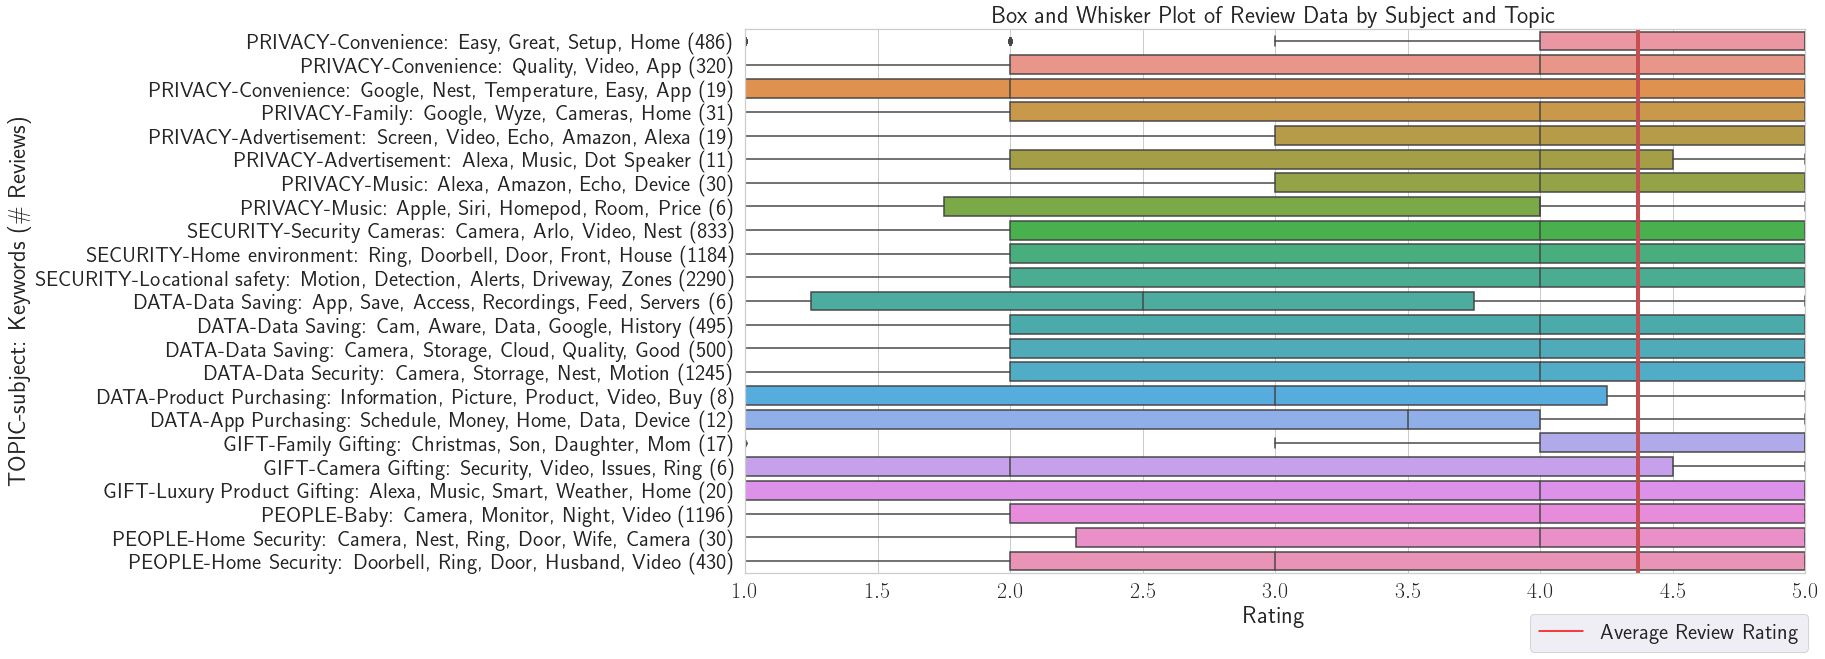

In [664]:
sns.set_style("whitegrid")
fig1, ax1 = plt.subplots(figsize=(19,10))
sns.set(font_scale=2)
sns.boxplot(data=df_boxplot,orient='h',ax=ax1).set(title='Box and Whisker Plot of Review Data by Subject and Topic', 
                                                 ylabel = "TOPIC-subject: Keywords (\# Reviews)",
                                                 xlabel = "Rating")
ax1.axvline(average_review_score, linewidth=4, color='r')
ax1.axvline(average_review_score, linewidth=4, color='r')
ax1.set_xlim([1,5])
ax1.axhline(y=5, xmin=average_review_score-1.96*sem, xmax=average_review_score+1.96*sem, linewidth=100, color='r')
#plt.savefig('histogram.pgf')

import matplotlib.lines as mlines

red_line = mlines.Line2D([], [], color='red', marker=None, label='Average Review Rating')
fig1.legend(handles=[red_line],loc='lower right', bbox_to_anchor=(0.91,0))
fig1.savefig('figures/boxplot-sub_top.pdf', bbox_inches='tight')

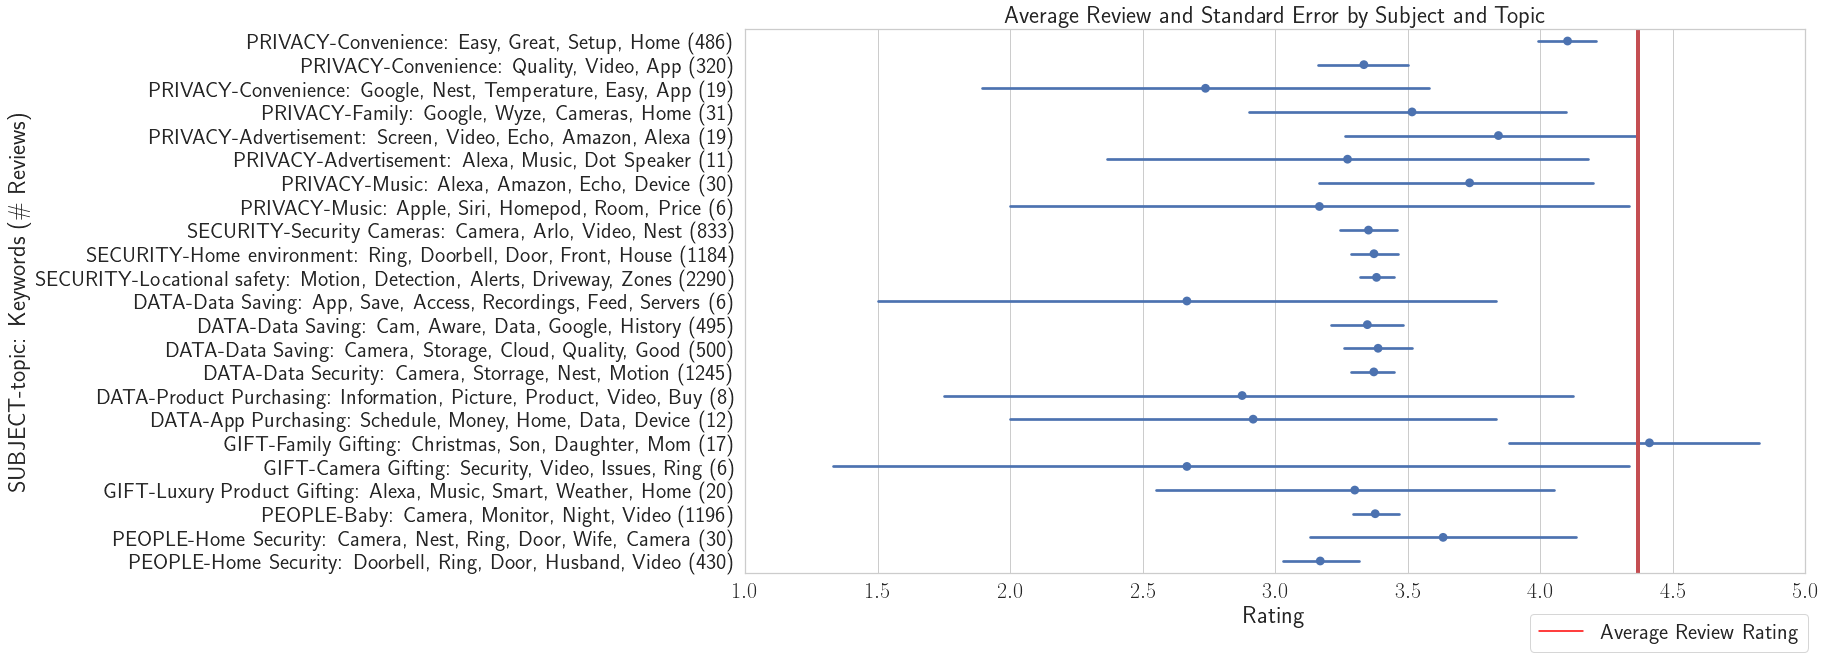

In [665]:
sns.set_style("whitegrid")
fig2, ax2 = plt.subplots(figsize=(19,10))
sns.pointplot(data=df_boxplot,orient='h', linestyles='None',ax=ax2).set(title='Average Review and Standard Error by Subject and Topic', 
                                                 ylabel = "SUBJECT-topic: Keywords (\# Reviews)",
                                                 xlabel = "Rating")
ax2.axvline(average_review_score, linewidth=4, color='r')
ax2.axvline(x=.5, ymin=0.25, ymax=0.75)
ax2.set_xlim([1,5])
fig2.legend(handles=[red_line],loc='lower right', bbox_to_anchor=(0.91,0))
fig2.savefig('figures/pointplot-sub_top.pdf', bbox_inches='tight')

In [666]:
df_total = df['rating'].to_frame()
df_total.columns = ["All Reviews"]

df_PS = df.loc[(df.PS == 1)]['rating'].to_frame()
df_PS.columns = ["P\&S Reviews"]

df_privacy = df.loc[(df.privacy == 1)]['rating'].to_frame()
df_privacy.columns = ["Privacy"]
df_security = df.loc[(df.security == 1)]['rating'].to_frame()
df_security.columns = ["Security"]
df_creepy = df.loc[(df.creepy == 1)]['rating'].to_frame()
df_creepy.columns = ["\"Creepy\""]
df_data = df.loc[(df.data == 1)]['rating'].to_frame()
df_data.columns = ["Data"]

df_concerns = df_privacy.copy()
df_concerns = pd.concat([df_concerns, df_security])
df_concerns = pd.concat([df_concerns, df_creepy])
df_concerns = pd.concat([df_concerns, df_data])
df_concerns = pd.concat([df_concerns, df_PS])
df_concerns = pd.concat([df_concerns, df_total])

<ipython-input-667-44c51211887f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")


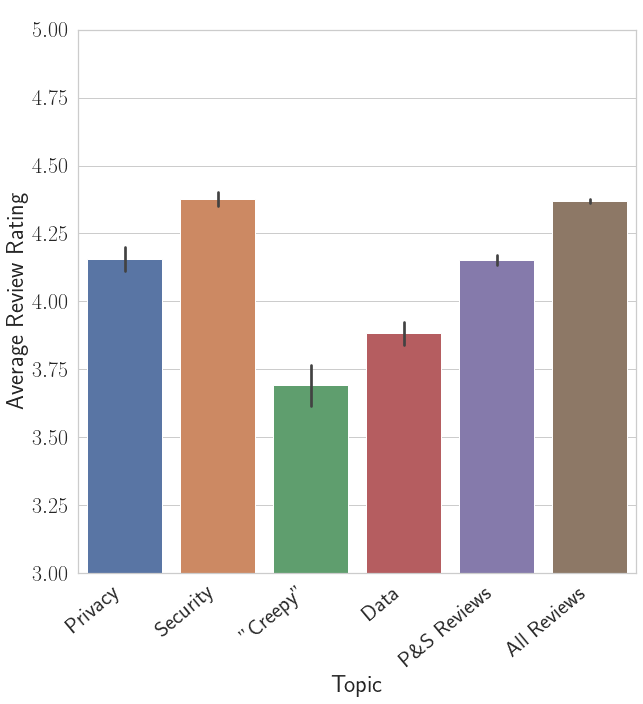

In [667]:
sns.set_style("whitegrid")
fig3, ax3 = plt.subplots(figsize=(10,10))
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
ax3.set_ylim([3,5])
sns.barplot(data=df_concerns,orient='v',ax=ax3).set(title=' ', 
                                                 ylabel = "Average Review Rating",
                                                 xlabel = "Topic")
fig2.savefig('figures/barplot-subject.pdf', bbox_inches='tight')

In [668]:
df_gift = df.loc[(df.gift == 1)&(df.PS == 1)]['rating'].to_frame()
df_gift.columns = ["Gift P\&S Reviews"]
df_people = df.loc[(df.people == 1)&(df.PS == 1)]['rating'].to_frame()
df_people.columns = ["People P\&S Reviews"]
df_personal = df.loc[(df.people == 0)&(df.gift == 0)&(df.PS == 1)]['rating'].to_frame()
df_personal.columns = ["Personal P\&S Reviews"]

df_external_internal = df_personal.copy()
df_external_internal = pd.concat([df_external_internal, df_gift])
df_external_internal = pd.concat([df_external_internal, df_people])
df_external_internal = pd.concat([df_external_internal, df_PS])
df_external_internal = pd.concat([df_external_internal, df_total])

<ipython-input-669-f0a5dc7e99c1>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")


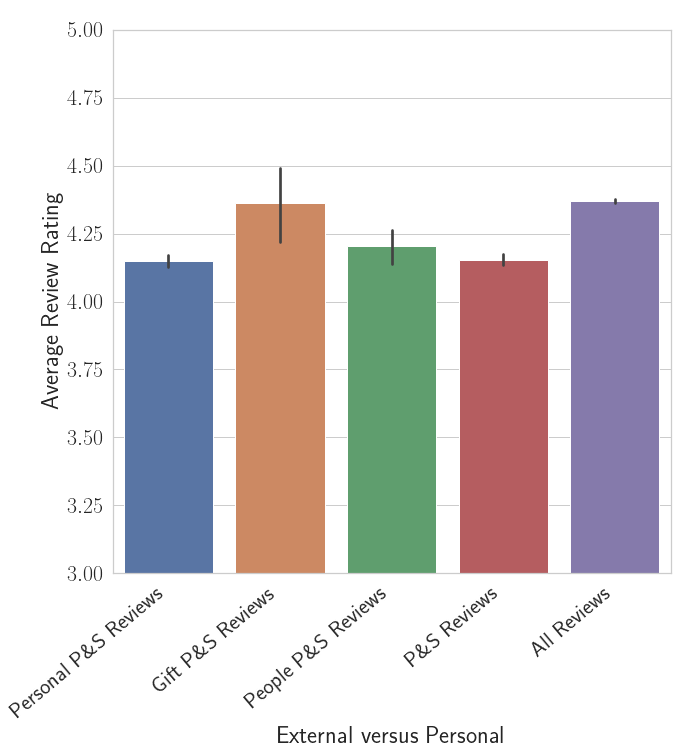

In [669]:
sns.set_style("whitegrid")
fig4, ax4 = plt.subplots(figsize=(10,10))
ax4.set_ylim([3,5])
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=40, ha="right")
sns.barplot(data=df_external_internal,orient='v',ax=ax4).set(title=' ', 
                                                 ylabel = "Average Review Rating",
                                                 xlabel = "External versus Personal")
fig4.savefig('figures/barplot-external_personal.pdf', bbox_inches='tight')

In [670]:
df_camera = [df.loc[(df.camera == 1)&(df.privacy == 1)]['rating'].to_frame(), 
             df.loc[(df.camera == 1)&(df.security == 1)]['rating'].to_frame(),
             df.loc[(df.camera == 1)&(df.creepy == 1)]['rating'].to_frame(),
             df.loc[(df.camera == 1)&(df.data == 1)]['rating'].to_frame(),
             df.loc[(df.camera == 1)&(df.PS == 1)]['rating'].to_frame(),
             df.loc[(df.camera == 1)]['rating'].to_frame()]
df_camera[0].columns = ["Cameras"]
df_camera[1].columns = ["Cameras"]
df_camera[2].columns = ["Cameras"]
df_camera[3].columns = ["Cameras"]
df_camera[4].columns = ["Cameras"]
df_camera[5].columns = ["Cameras"]
df_doorbell = [df.loc[(df.doorbell == 1)&(df.privacy == 1)]['rating'].to_frame(), 
             df.loc[(df.doorbell == 1)&(df.security == 1)]['rating'].to_frame(),
             df.loc[(df.doorbell == 1)&(df.creepy == 1)]['rating'].to_frame(),
             df.loc[(df.doorbell == 1)&(df.data == 1)]['rating'].to_frame(),
             df.loc[(df.doorbell == 1)&(df.PS == 1)]['rating'].to_frame(),
             df.loc[(df.doorbell == 1)]['rating'].to_frame()]
df_doorbell[0].columns = ["Doorbell"]
df_doorbell[1].columns = ["Doorbell"]
df_doorbell[2].columns = ["Doorbell"]
df_doorbell[3].columns = ["Doorbell"]
df_doorbell[4].columns = ["Doorbell"]
df_doorbell[5].columns = ["Doorbell"]
df_voice = [df.loc[(df.voice == 1)&(df.privacy == 1)]['rating'].to_frame(), 
             df.loc[(df.voice == 1)&(df.security == 1)]['rating'].to_frame(),
             df.loc[(df.voice == 1)&(df.creepy == 1)]['rating'].to_frame(),
             df.loc[(df.voice == 1)&(df.data == 1)]['rating'].to_frame(),
             df.loc[(df.voice == 1)&(df.PS == 1)]['rating'].to_frame(),
             df.loc[(df.voice == 1)]['rating'].to_frame()]
df_voice[0].columns = ["Voice Assistants"]
df_voice[1].columns = ["Voice Assistants"]
df_voice[2].columns = ["Voice Assistants"]
df_voice[3].columns = ["Voice Assistants"]
df_voice[4].columns = ["Voice Assistants"]
df_voice[5].columns = ["Voice Assistants"]
df_video = [df.loc[(df.videocall == 1)&(df.privacy == 1)]['rating'].to_frame(), 
             df.loc[(df.videocall == 1)&(df.security == 1)]['rating'].to_frame(),
             df.loc[(df.videocall == 1)&(df.creepy == 1)]['rating'].to_frame(),
             df.loc[(df.videocall == 1)&(df.data == 1)]['rating'].to_frame(),
             df.loc[(df.videocall == 1)&(df.PS == 1)]['rating'].to_frame(),
             df.loc[(df.videocall == 1)]['rating'].to_frame()]
df_video[0].columns = ["Video Platforms"]
df_video[1].columns = ["Video Platforms"]
df_video[2].columns = ["Video Platforms"]
df_video[3].columns = ["Video Platforms"]
df_video[4].columns = ["Video Platforms"]
df_video[5].columns = ["Video Platforms"]
df_other = [df.loc[(df.other == 1)&(df.privacy == 1)]['rating'].to_frame(), 
             df.loc[(df.other == 1)&(df.security == 1)]['rating'].to_frame(),
             df.loc[(df.other == 1)&(df.creepy == 1)]['rating'].to_frame(),
             df.loc[(df.other == 1)&(df.data == 1)]['rating'].to_frame(),
             df.loc[(df.other == 1)&(df.PS == 1)]['rating'].to_frame(),
             df.loc[(df.other == 1)]['rating'].to_frame()]
df_other[0].columns = ["Other"]
df_other[1].columns = ["Other"]
df_other[2].columns = ["Other"]
df_other[3].columns = ["Other"]
df_other[4].columns = ["Other"]
df_other[5].columns = ["Other"]

big_df = [df_camera, df_doorbell, df_voice, df_video, df_other]

<ipython-input-671-689502e00b36>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-671-689502e00b36>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-671-689502e00b36>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-671-689502e00b36>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-671-689502e00b36>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-671-689502e00b36>:18: UserWarning: FixedFormatter should only be 

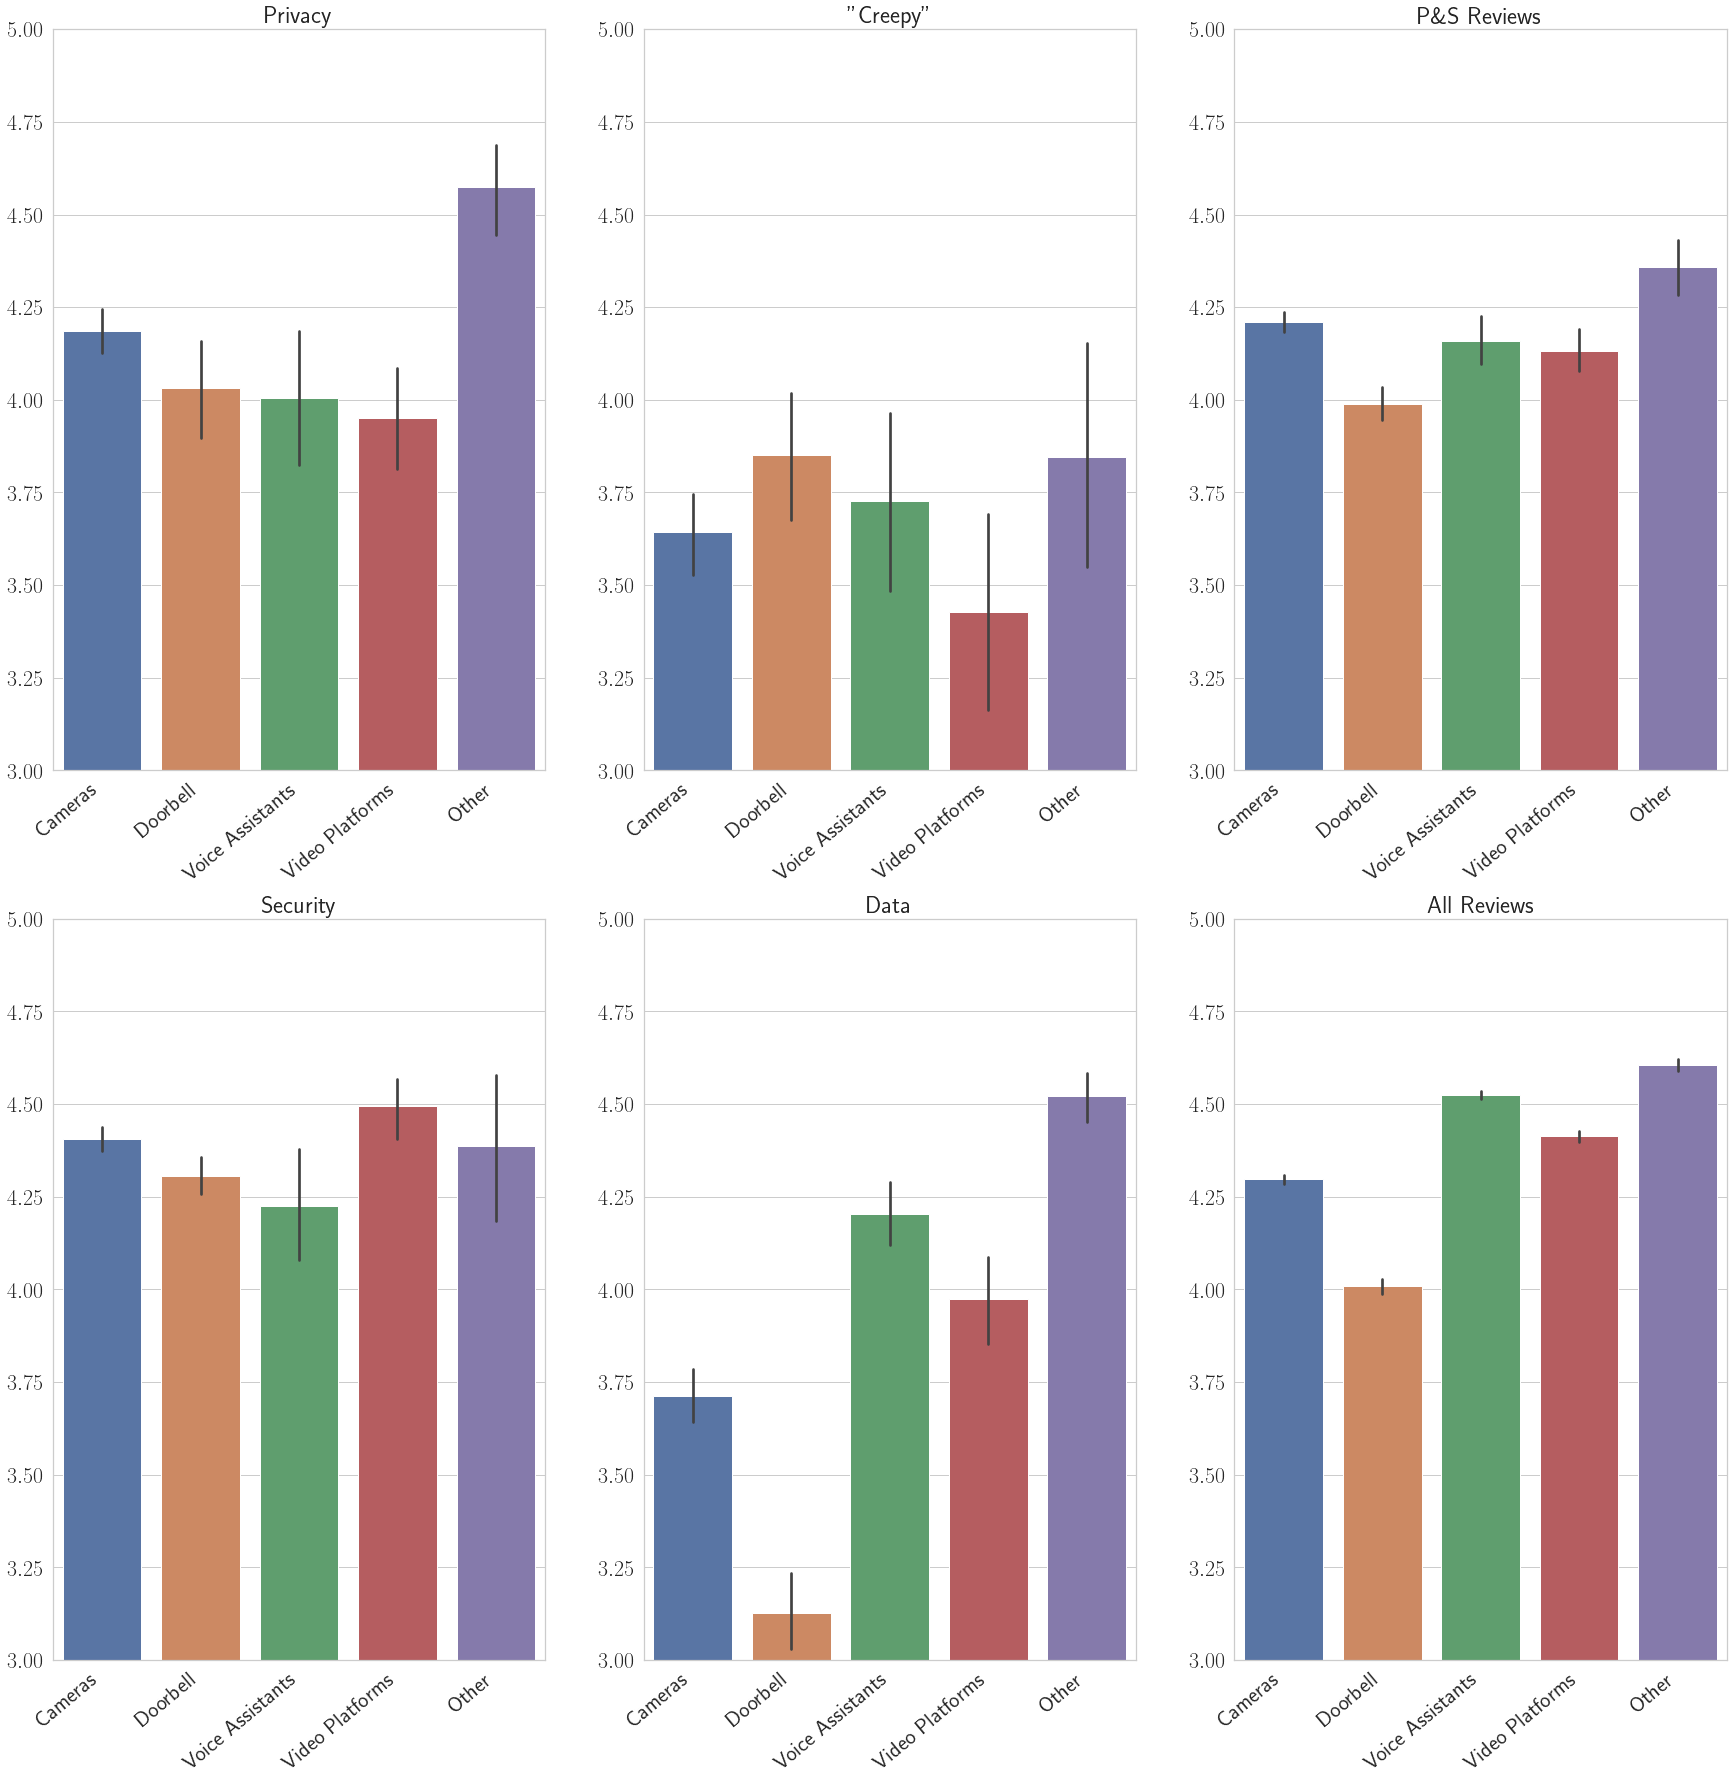

In [671]:
sns.set_style("whitegrid")
figs5, axs5 = plt.subplots(2,3,figsize=(30,30))

privacy_loc = [0,0]
security_loc = [1,0]
creepy_loc = [0,2]
data_loc = [0,1]
ps_loc = [1,1]
all_loc = [1,2]

locations = [privacy_loc, security_loc, creepy_loc, data_loc, ps_loc, all_loc]
loc_names = ["Privacy", "Security","\"Creepy\"","Data","P\&S Reviews","All Reviews"]

for l in range(len(locations)):
    location = locations[l]
    loc_in_df = location[0] + location[1]*2
    axis = axs5[location[0]][location[1]]
    axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
    df_fused = big_df[0][loc_in_df]
    for i in range(1,5):
        df_fused = pd.concat([df_fused, big_df[i][loc_in_df]])
    axis.set_ylim([3,5])
    sns.barplot(data=df_fused,orient='v',ax=axis).set(title=loc_names[loc_in_df])

#fig2.savefig('figures/barplot-external_personal.pgf', bbox_inches='tight')

In [672]:
x_axis_names = ["Privacy", "Security","\"Creepy\"","Data","P\&S Reviews","All Reviews"]
df_camera[0].columns = [x_axis_names[0]]
df_camera[1].columns = [x_axis_names[1]]
df_camera[2].columns = [x_axis_names[2]]
df_camera[3].columns = [x_axis_names[3]]
df_camera[4].columns = [x_axis_names[4]]
df_camera[5].columns = [x_axis_names[5]]
df_doorbell[0].columns = [x_axis_names[0]]
df_doorbell[1].columns = [x_axis_names[1]]
df_doorbell[2].columns = [x_axis_names[2]]
df_doorbell[3].columns = [x_axis_names[3]]
df_doorbell[4].columns = [x_axis_names[4]]
df_doorbell[5].columns = [x_axis_names[5]]
df_voice[0].columns = [x_axis_names[0]]
df_voice[1].columns = [x_axis_names[1]]
df_voice[2].columns = [x_axis_names[2]]
df_voice[3].columns = [x_axis_names[3]]
df_voice[4].columns = [x_axis_names[4]]
df_voice[5].columns = [x_axis_names[5]]
df_video[0].columns = [x_axis_names[0]]
df_video[1].columns = [x_axis_names[1]]
df_video[2].columns = [x_axis_names[2]]
df_video[3].columns = [x_axis_names[3]]
df_video[4].columns = [x_axis_names[4]]
df_video[5].columns = [x_axis_names[5]]
df_other[0].columns = [x_axis_names[0]]
df_other[1].columns = [x_axis_names[1]]
df_other[2].columns = [x_axis_names[2]]
df_other[3].columns = [x_axis_names[3]]
df_other[4].columns = [x_axis_names[4]]
df_other[5].columns = [x_axis_names[5]]

big_df = [df_camera, df_doorbell, df_voice, df_video, df_other]

<ipython-input-673-29a8e30df20c>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-673-29a8e30df20c>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-673-29a8e30df20c>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-673-29a8e30df20c>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-673-29a8e30df20c>:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
<ipython-input-673-29a8e30df20c>:20: UserWarning: FixedFormatter should only be 

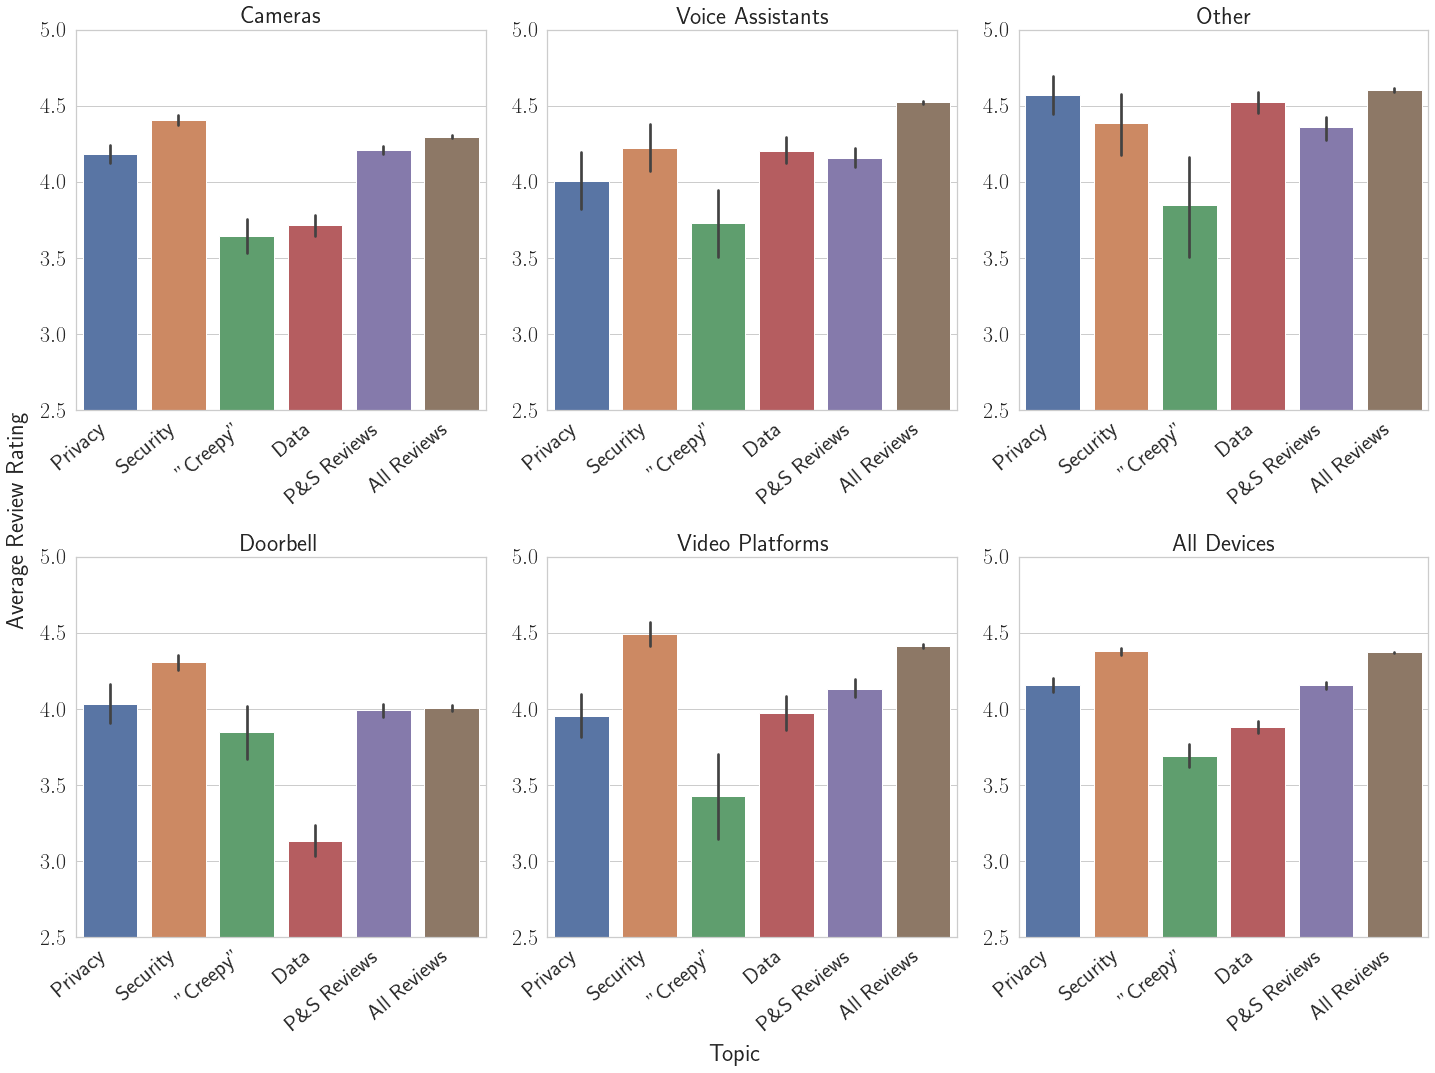

In [673]:
sns.set_style("whitegrid")
figs6, axs6 = plt.subplots(2,3,figsize=(20,15))

#df_concerns

camera_loc = [0,0]
doorbell_loc = [0,1]
voice_assistants_loc = [0,2]
video_platforms_loc = [1,0]
other_loc = [1,1]
all_device_loc = [1,2]

locations = [camera_loc, doorbell_loc, voice_assistants_loc, video_platforms_loc, other_loc, all_device_loc]
loc_names = ["Cameras", "Doorbell","Voice Assistants","Video Platforms","Other","All Devices"]

for l in range(len(locations)):
    location = locations[l]
    loc_in_df = location[0] + location[1]*2
    axis = axs6[location[0]][location[1]]
    axis.set_xticklabels(axis.get_xticklabels(), rotation=40, ha="right")
    axis.set_ylim([2.5,5])
    if(l < len(locations)-1):
        df_fused = big_df[loc_in_df][0]
        for i in range(1,6):
            df_fused = pd.concat([df_fused, big_df[loc_in_df][i]])
        sns.barplot(data=df_fused,orient='v',ax=axis).set(title=loc_names[loc_in_df])
    else:
        sns.barplot(data=df_concerns,orient='v',ax=axis).set(title=loc_names[loc_in_df])
figs6.text(0.5, 0, "Topic", ha='center')
figs6.text(-0.005, 0.5, "Average Review Rating", va='center', rotation='vertical')
figs6.tight_layout()
figs6.savefig('figures/barplot-device_concern.pdf', bbox_inches='tight')

In [776]:
df_metadata = pd.read_csv("metadata.csv",dtype={'source': 'string', "version":"string"})
df_metadata.head()

,product,version,source,total_reviews,PS_reviews,non-PS-0_reviews,non-PS-1_reviews,non-PS-2_reviews,non-PS-3_reviews,non-PS-4_reviews,non-PS-5_reviews,PS-0_reviews,PS-1_reviews,PS-2_reviews,PS-3_reviews,PS-4_reviews,PS-5_reviews
0,NestOutdoorCam,<NA>,AMZ,2567,733,0,181,83,108,223,1239,0,112,68,69,102,382
1,GoogleHomeMini,1stGen,BB,15060,366,0,56,74,456,3214,10894,0,4,4,19,95,244
2,NestMini,2stGen,BB,1918,53,0,15,15,58,332,1445,0,3,2,6,8,34
3,EchoShow,8,BB,1893,138,0,13,9,55,248,1430,0,4,1,2,24,107
4,RingFloodlightCam,<NA>,AMZ,3679,809,0,325,100,163,321,1961,0,85,39,35,102,548


<ipython-input-675-3f051dbcd738>:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax7.set_xticklabels(ax7.get_xticklabels(), rotation=40, ha="right")


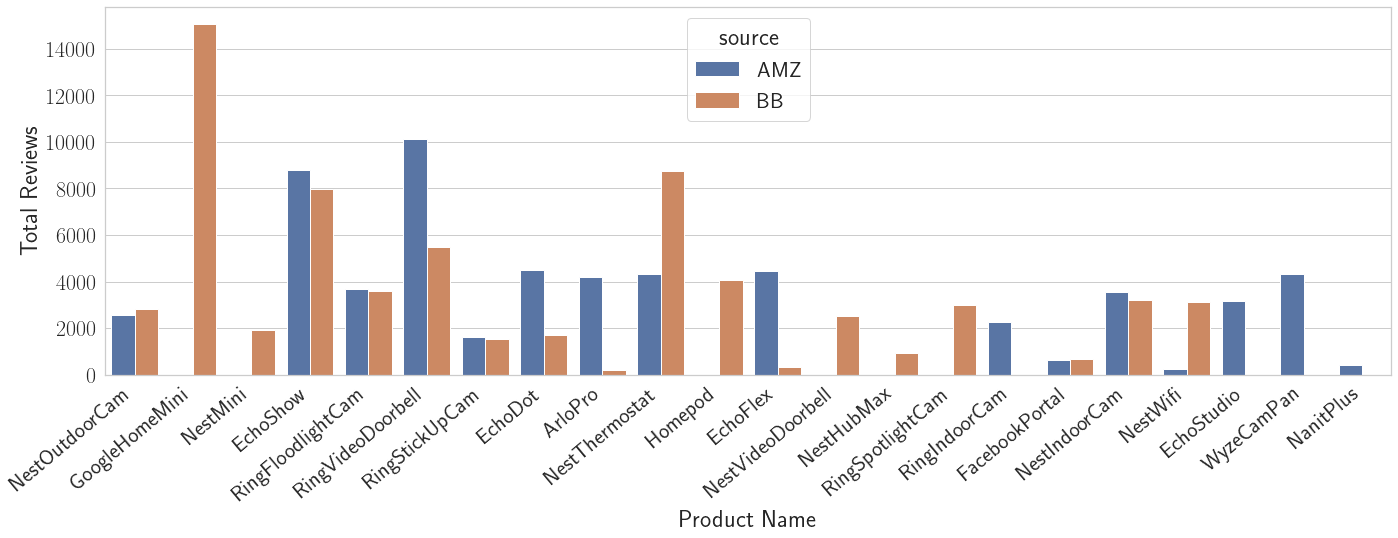

In [675]:
sns.set_style("whitegrid")
def sum(x, **kws):
    return x.sum()

fig7, ax7 = plt.subplots(figsize=(20,8))
ax7.set_xticklabels(ax7.get_xticklabels(), rotation=40, ha="right")
sns.barplot(data=df_metadata, x="product", y="total_reviews",hue="source", ci=None, ax=ax7, estimator=sum).set(
                                                    ylabel = "Total Reviews",
                                                    xlabel = "Product Name")
fig7.tight_layout()
fig7.savefig('figures/total-reviews.pdf', bbox_inches='tight')

<ipython-input-778-a6c488b2ebb8>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax8.set_xticklabels(ax8.get_xticklabels(), rotation=40, ha="right")


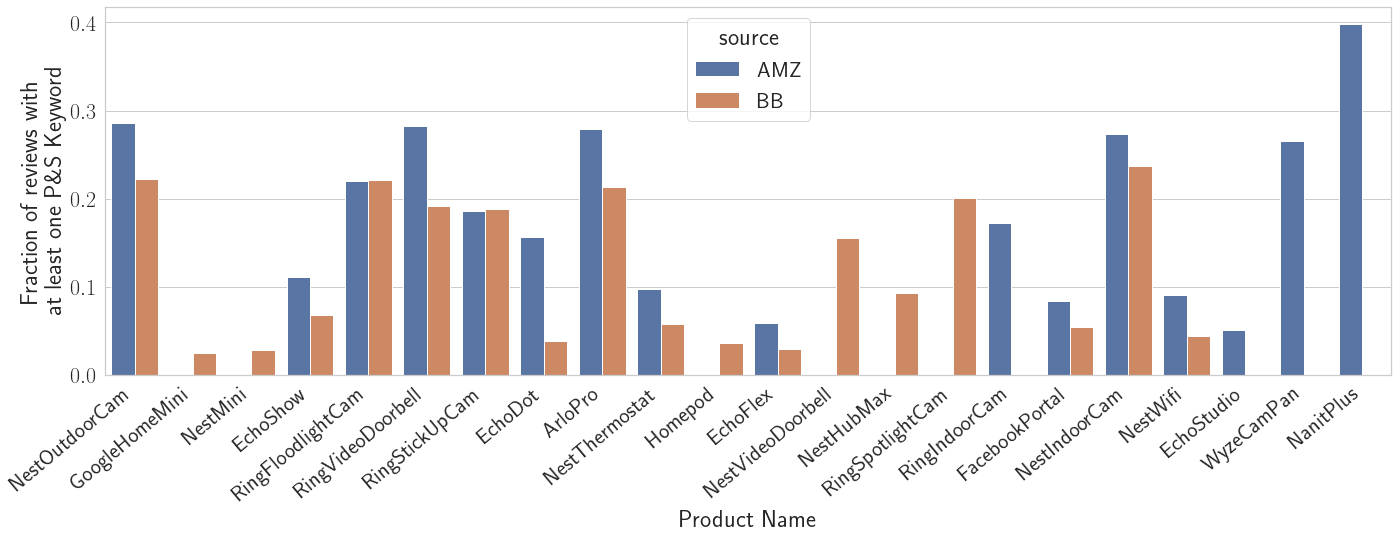

In [778]:
sns.set_style("whitegrid")
from textwrap import wrap
df_metadata['PS_percent']=df_metadata["PS_reviews"]/df_metadata["total_reviews"]

fig8, ax8 = plt.subplots(figsize=(20,8))
ax8.set_xticklabels(ax8.get_xticklabels(), rotation=40, ha="right")
sns.barplot(data=df_metadata, x="product", y="PS_percent",hue="source", ci=None, ax=ax8).set(
                                                    ylabel = "Fraction of reviews with \nat least one P\&S Keyword",
                                                    xlabel = "Product Name")
fig8.tight_layout()
fig8.savefig('figures/total-ps_reviews_percent.pdf', bbox_inches='tight')

In [799]:
sns.set_style("whitegrid")
from textwrap import wrap
df_metadata = pd.read_csv("metadata.csv",dtype={'source': 'string', "version":"string"})
df_metadata['PS_percent']=df_metadata["PS_reviews"]/df_metadata["total_reviews"]
df_metadata['security'] = np.where("Cam" in str(df_metadata['product']),
                                   #("Doorbell" in df_metadata['product'])|
                                   #("Arlo" in df_metadata['product'])|
                                   #("Nanit" in df_metadata['product'])), 
                                   'security', 'non-security')
df_metadata_v2 = df_metadata.sort_values(by = 'security')
df_metadata_v2.drop(["version","source"],axis=1)
df_metadata_v2.groupby(["product"], axis=0).sum()
df_metadata


,product,version,source,total_reviews,PS_reviews,non-PS-0_reviews,non-PS-1_reviews,non-PS-2_reviews,non-PS-3_reviews,non-PS-4_reviews,non-PS-5_reviews,PS-0_reviews,PS-1_reviews,PS-2_reviews,PS-3_reviews,PS-4_reviews,PS-5_reviews,PS_percent,security
0,NestOutdoorCam,<NA>,AMZ,2567,733,0,181,83,108,223,1239,0,112,68,69,102,382,0.285547,security
1,GoogleHomeMini,1stGen,BB,15060,366,0,56,74,456,3214,10894,0,4,4,19,95,244,0.024303,security
2,NestMini,2stGen,BB,1918,53,0,15,15,58,332,1445,0,3,2,6,8,34,0.027633,security
3,EchoShow,8,BB,1893,138,0,13,9,55,248,1430,0,4,1,2,24,107,0.072900,security
4,RingFloodlightCam,<NA>,AMZ,3679,809,0,325,100,163,321,1961,0,85,39,35,102,548,0.219897,security
5,RingVideoDoorbell,2,AMZ,4347,1179,0,596,324,356,459,1433,0,216,104,94,171,594,0.271222,security
6,RingStickUpCam,<NA>,BB,1532,289,0,27,21,46,211,938,0,8,6,12,38,225,0.188642,security
7,EchoDot,3Gen,BB,1702,65,0,1,1,3,136,1496,0,0,0,0,11,54,0.038190,security
8,RingVideoDoorbell,Pro,AMZ,211,80,0,73,14,10,15,19,0,29,13,7,9,22,0.379147,security
9,RingVideoDoorbell,Pro,BB,4375,830,0,70,61,174,798,2442,0,17,16,27,155,615,0.189714,security


In [759]:
df_time = pd.read_csv("time_aggregated_reviews_devices.csv")
df_time

,device-group,product,topic,subject,time,frac-reviews,avg-rating
0,Cameras,NestOutdoorCam,PRIVACY,Convenience,0,0.000000,1.000000
1,Cameras,NestOutdoorCam,PRIVACY,Convenience,1,0.000000,1.000000
2,Cameras,NestOutdoorCam,PRIVACY,Convenience,2,0.000000,1.000000
3,Cameras,NestOutdoorCam,PRIVACY,Convenience,3,0.000000,1.000000
4,Cameras,NestOutdoorCam,PRIVACY,Convenience,4,0.000000,1.000000
...,...,...,...,...,...,...,...
4395,All,All,PEOPLE,Home Security,20,0.000215,2.851852
4396,All,All,PEOPLE,Home Security,21,0.000175,3.363636
4397,All,All,PEOPLE,Home Security,22,0.000119,2.933333
4398,All,All,PEOPLE,Home Security,23,0.000000,1.000000


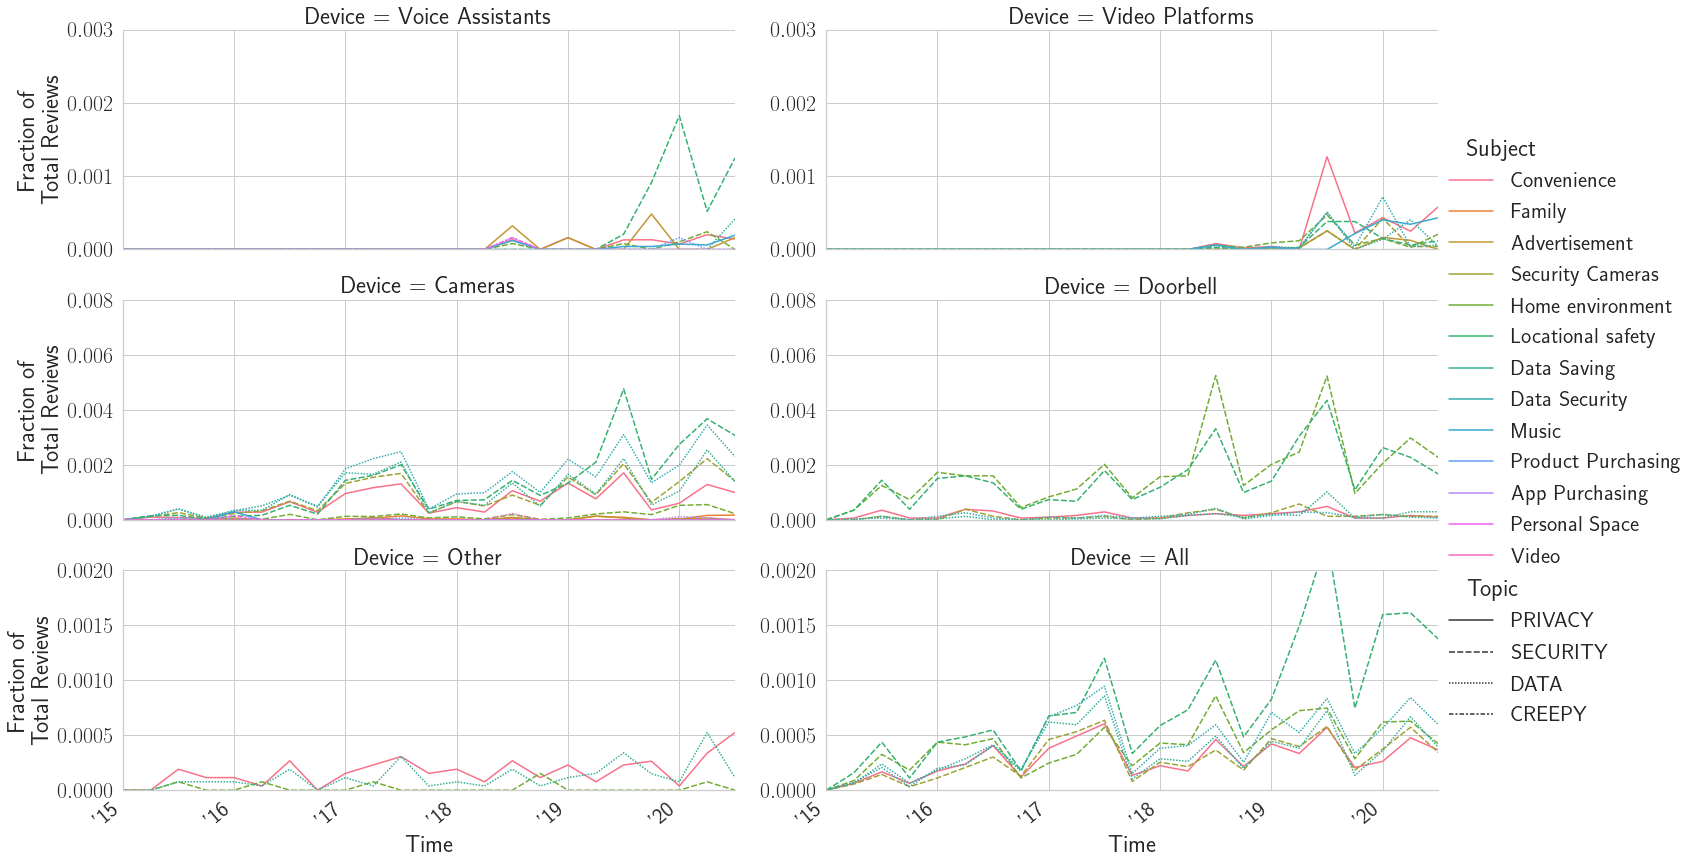

In [760]:
#fig9, ax9 = plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
df_time_subj= df_time.loc[(df_time.time < 23)&((df_time.topic != "GIFT")
                                                &(df_time.topic != "PEOPLE"))]

df_time_subj = df_time_subj.rename(columns={"device-group": "Device", "time": "Time","subject": "Subject", 
                                            "frac-reviews":"Fraction of \nTotal Reviews",
                                           "topic":"Topic"})
fg9 = sns.relplot(
    data=df_time_subj, x="Time", y="Fraction of \nTotal Reviews", col="Device",
    col_order=["Voice Assistants", "Video Platforms","Cameras", "Doorbell", "Other", "All"],
    facet_kws={'sharey': False, 'sharex': True},
    hue="Subject",kind="line",col_wrap=2, style="Topic",
    height=4, aspect=10/4, ci=None
)
counter = 0

label_text = ["\'15","\'16","\'17","\'18","\'19","\'20"]

for ax in fg9.axes.flat:
    #a_plot.set(xlim=(0, 45))
    ax.set(xlim=(0,22))
    if(counter < 2):
        ax.set(ylim=(0, 0.003))
    elif(counter == 4):
        ax.set(ylim=(0, 0.002))
    elif(counter == 5):
        ax.set(ylim=(0, 0.002))
    else:
        ax.set(ylim=(0,0.008))
    ax.set_xticks(np.arange(0, 24, 4))
    ax.set_xticklabels(label_text, rotation=40, ha="right")
    counter += 1
fg9.savefig('figures/lineplot-subject-modeling.pdf', bbox_inches='tight')

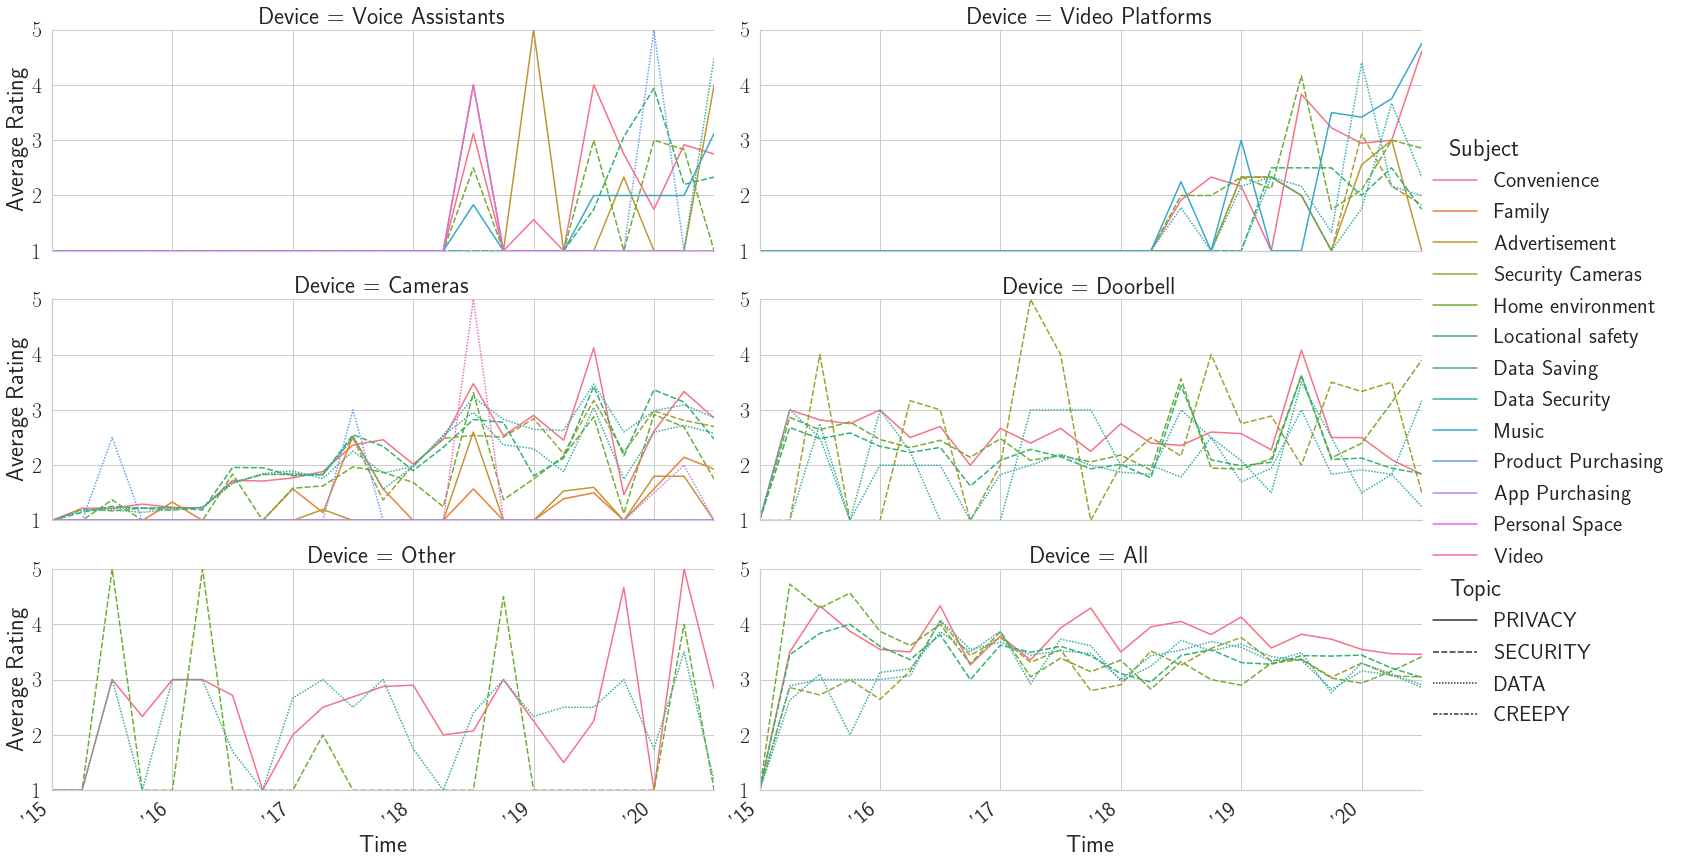

In [761]:
#fig9, ax9 = plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
df_time_subj_rating= df_time.loc[(df_time.time < 23)&((df_time.topic != "GIFT")
                                                &(df_time.topic != "PEOPLE"))]

df_time_subj_rating = df_time_subj_rating.rename(columns={"device-group": "Device", "time": "Time","subject": "Subject", 
                                            "frac-reviews":"Fraction of \nTotal Reviews",
                                           "topic":"Topic", "avg-rating": "Average Rating"})
fg12 = sns.relplot(
    data=df_time_subj_rating, x="Time", y="Average Rating", col="Device",
    col_order=["Voice Assistants", "Video Platforms","Cameras", "Doorbell", "Other", "All"],
    facet_kws={'sharey': False, 'sharex': True},
    hue="Subject",kind="line",col_wrap=2, style="Topic",
    height=4, aspect=10/4,ci=None
)
counter = 0

label_text = ["\'15","\'16","\'17","\'18","\'19","\'20"]

for ax in fg12.axes.flat:
    #a_plot.set(xlim=(0, 45))
    ax.set(xlim=(0,22))
    ax.set(ylim=(1,5))
    ax.set_xticks(np.arange(0, 24, 4))
    ax.set_xticklabels(label_text, rotation=40, ha="right")
    counter += 1
fg12.savefig('figures/lineplot-subject-modeling-review.pdf', bbox_inches='tight')

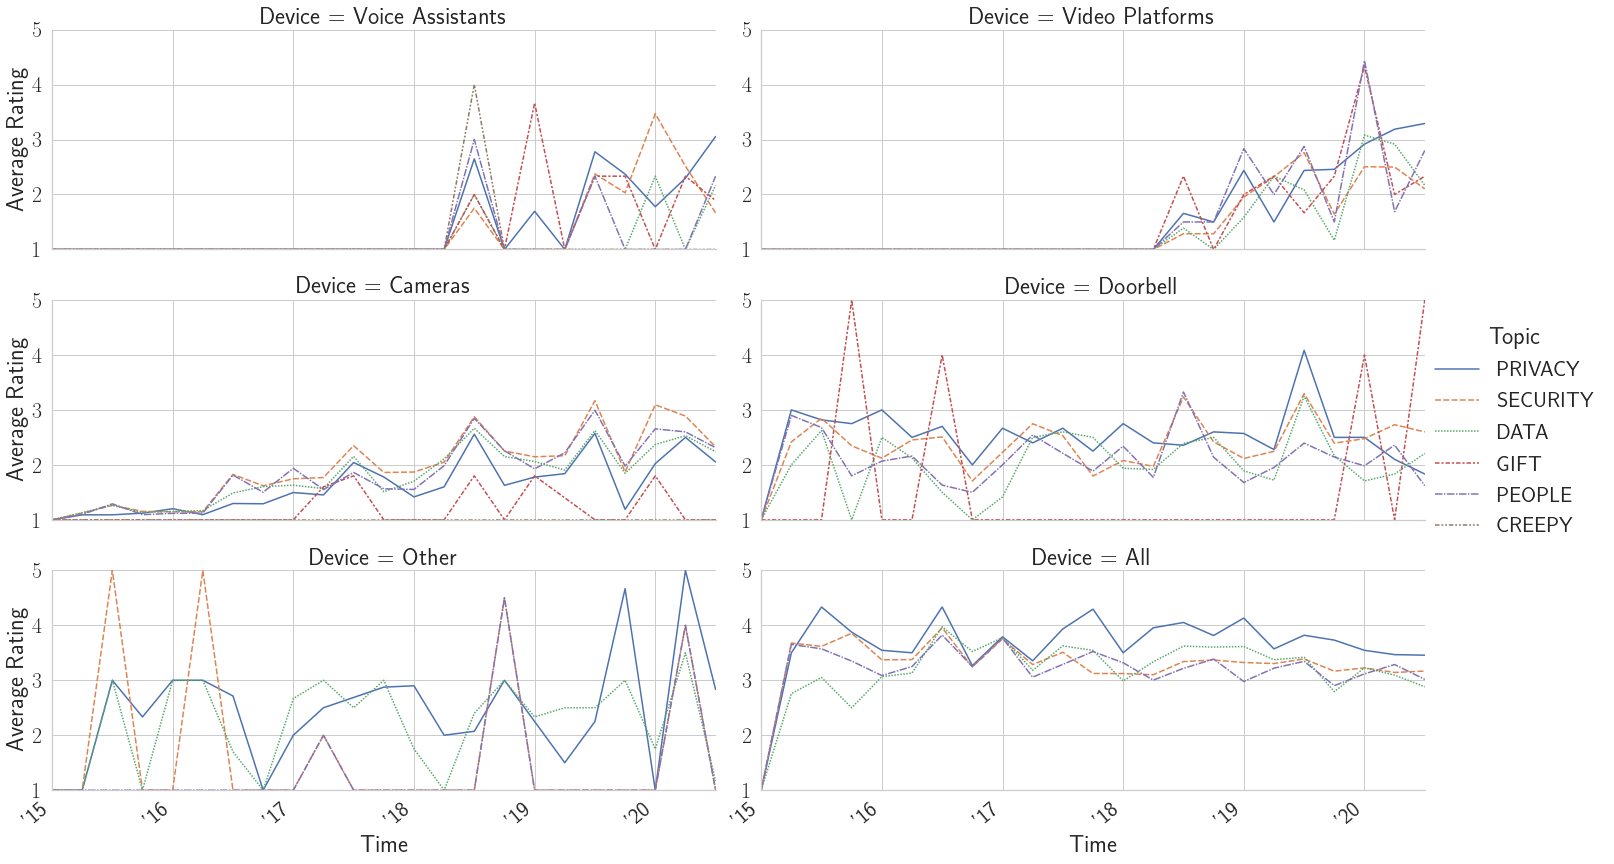

In [772]:
#fig9, ax9 = plt.subplots(figsize=(20,8))
sns.set_style("whitegrid")
df_time_subj_rating= df_time.loc[(df_time.time < 23)]

df_time_subj_rating = df_time_subj_rating.rename(columns={"device-group": "Device", "time": "Time","subject": "Subject", 
                                            "frac-reviews":"Fraction of \nTotal Reviews",
                                           "topic":"Topic", "avg-rating": "Average Rating"})
fg13 = sns.relplot(
    data=df_time_subj_rating, x="Time", y="Average Rating", col="Device",
    col_order=["Voice Assistants", "Video Platforms","Cameras", "Doorbell", "Other", "All"],
    facet_kws={'sharey': False, 'sharex': True},
    hue="Topic",kind="line",col_wrap=2, style="Topic",
    height=4, aspect=10/4,ci=None
)
counter = 0

label_text = ["\'15","\'16","\'17","\'18","\'19","\'20"]

for ax in fg13.axes.flat:
    #a_plot.set(xlim=(0, 45))
    ax.set(xlim=(0,22))
    ax.set(ylim=(1,5))
    ax.set_xticks(np.arange(0, 24, 4))
    ax.set_xticklabels(label_text, rotation=40, ha="right")
    counter += 1
fg13.savefig('figures/lineplot-topic-modeling-review.pdf', bbox_inches='tight')

In [768]:
df_time2 = pd.read_csv("time_aggregated_reviews_keywords.csv")
df_time2

,device-group,product,topic,time,frac-reviews,avg-rating
0,Cameras,NestOutdoorCam,all reviews,0,0.000000,1.000000
1,Cameras,NestOutdoorCam,all reviews,1,0.000000,1.000000
2,Cameras,NestOutdoorCam,all reviews,2,0.000000,1.000000
3,Cameras,NestOutdoorCam,all reviews,3,0.000000,1.000000
4,Cameras,NestOutdoorCam,all reviews,4,0.000000,1.000000
...,...,...,...,...,...,...
3445,All,All,privacy,20,0.003195,4.196517
3446,All,All,privacy,21,0.002671,4.119048
3447,All,All,privacy,22,0.002551,4.003115
3448,All,All,privacy,23,0.000000,1.000000


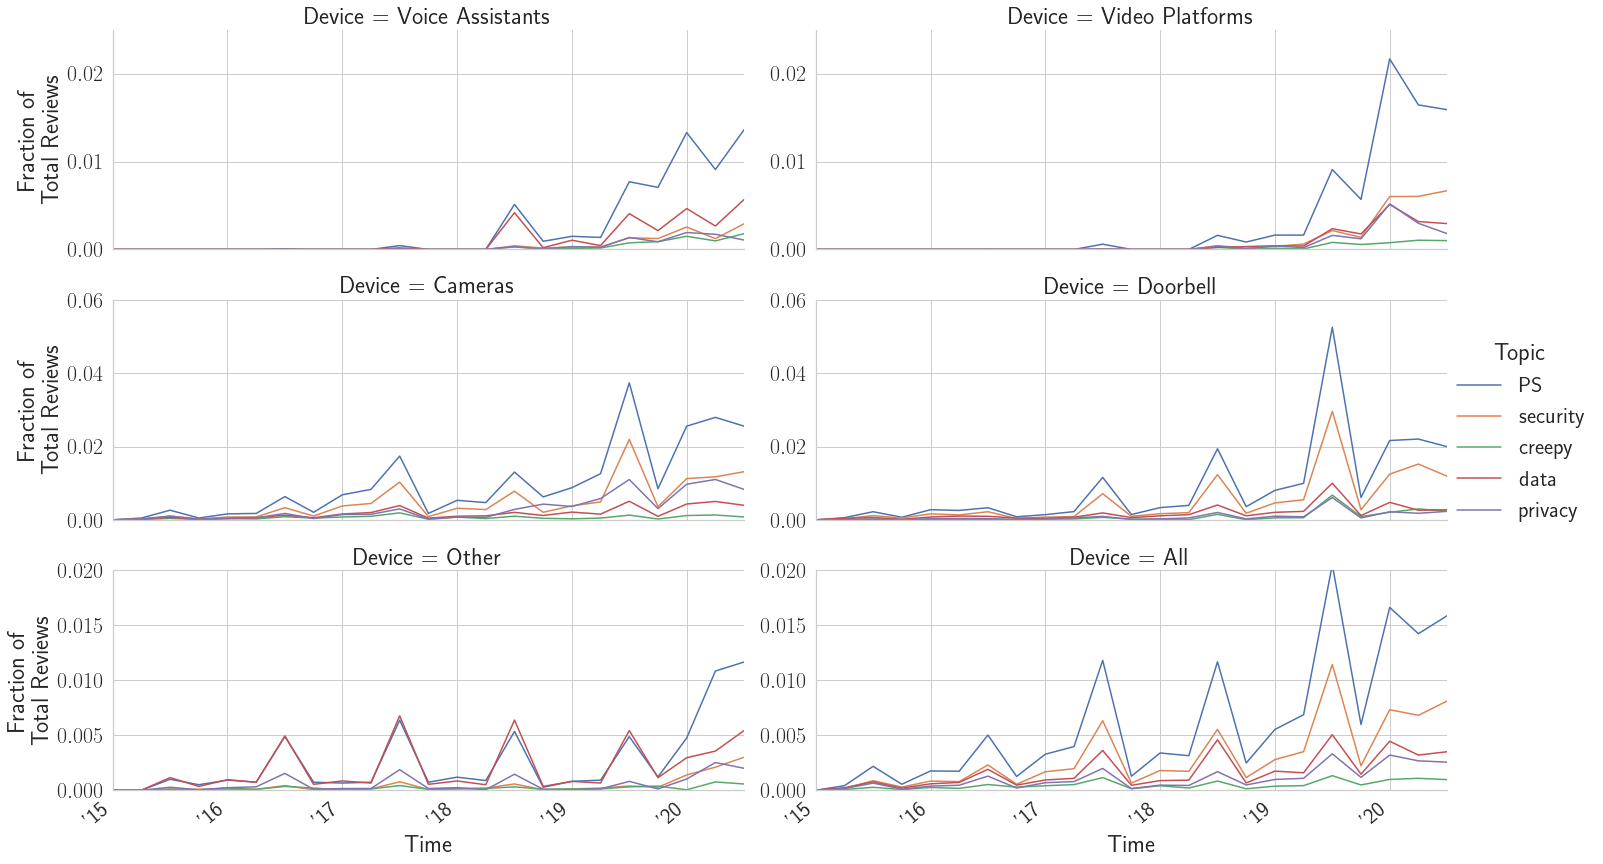

In [771]:
df_time_topic= df_time2.loc[(df_time2.time < 23)&(df_time2.topic != "all reviews")]
df_time_topic = df_time_topic.rename(columns={"device-group": "Device", "topic": "Topic", "time": "Time","frac-reviews":"Fraction of \nTotal Reviews"})
sns.set_style("whitegrid")
fg10 = sns.relplot(
    data=df_time_topic, x="Time", y="Fraction of \nTotal Reviews", col="Device",
    hue="Topic",kind="line",col_wrap=2, 
    col_order=["Voice Assistants", "Video Platforms","Cameras", "Doorbell","Other","All"], #style="topic"
    facet_kws={'sharey': False, 'sharex': True},
    height=4, aspect=10/4,ci=None
)
counter = 0
label_text = ["\'15","\'16","\'17","\'18","\'19","\'20"]
for ax in fg10.axes.flat:
    ax.set(xlim=(0,22))
    #a_plot.set(xlim=(0, 45))
    if(counter < 2):
        ax.set(ylim=(0, 0.025))
    elif(counter < 4):
        ax.set(ylim=(0,0.06))
    else:
        ax.set(ylim=(0,0.02))
    counter += 1
    ax.set_xticks(np.arange(0, 24, 4))
    ax.set_xticklabels(label_text, rotation=40, ha="right")
fg10.savefig('figures/lineplot-topic-keyword.pdf', bbox_inches='tight')


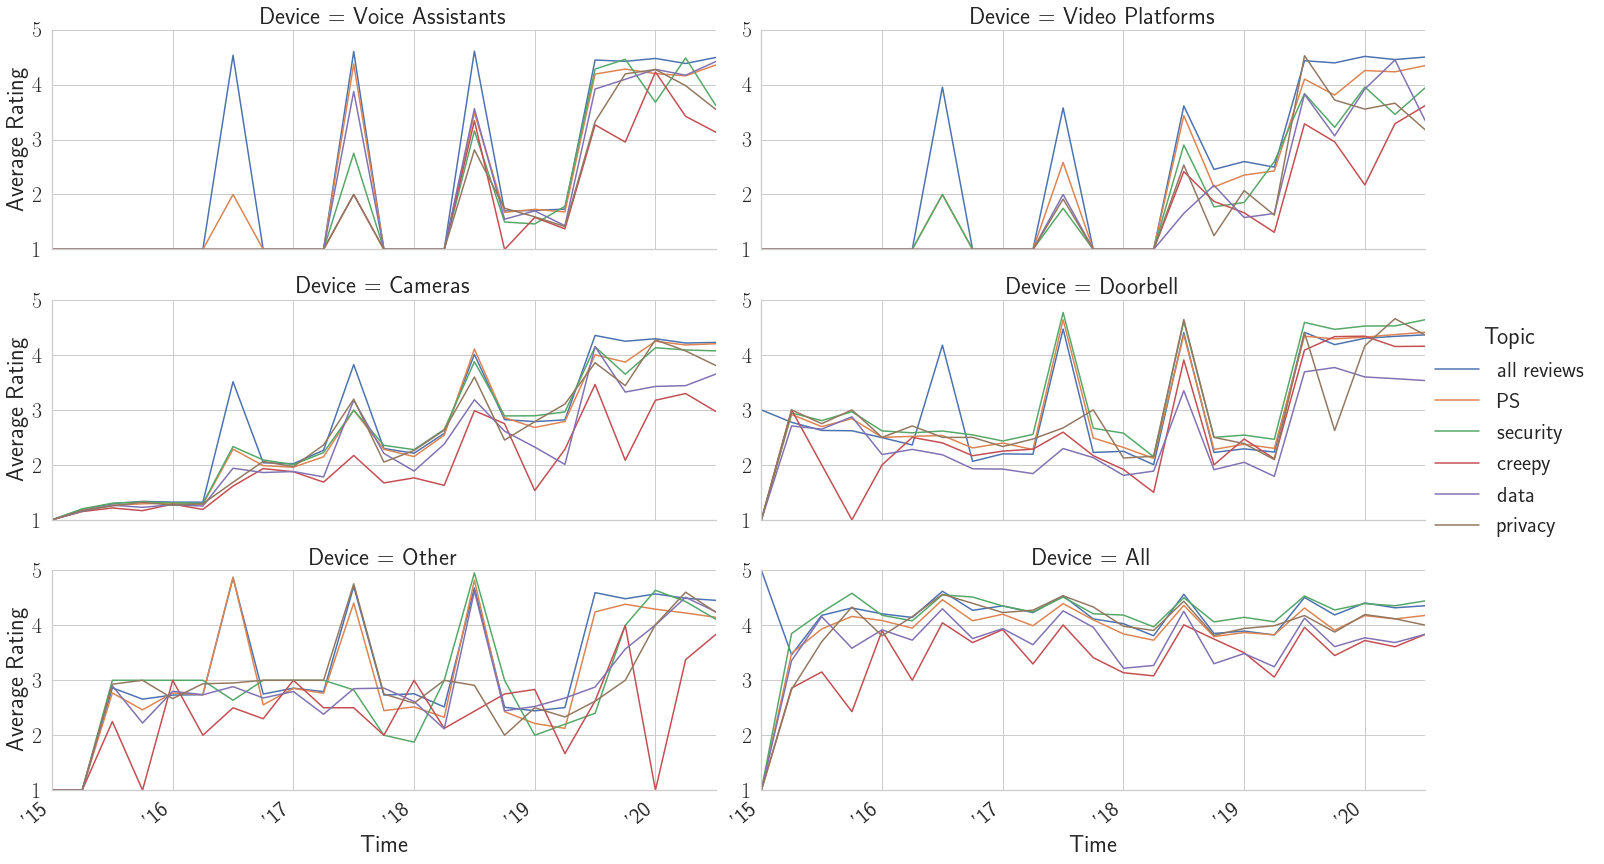

In [767]:
df_time_topic= df_time2.loc[(df_time2.time < 23)]
df_time_topic = df_time_topic.rename(columns={"device-group": "Device", "topic": "Topic", 
                                              "time": "Time", "avg-rating": "Average Rating",
                                              "frac-reviews":"Fraction of \nTotal Reviews"})
sns.set_style("whitegrid")
fg11 = sns.relplot(
    data=df_time_topic, x="Time", y="Average Rating", col="Device",
    hue="Topic",kind="line",col_wrap=2, 
    col_order=["Voice Assistants", "Video Platforms","Cameras", "Doorbell","Other","All"], #style="topic"
    facet_kws={'sharey': False, 'sharex': True},
    height=4, aspect=10/4,ci=None
)
counter = 0
label_text = ["\'15","\'16","\'17","\'18","\'19","\'20"]
for ax in fg11.axes.flat:
    ax.set(xlim=(0,22))
    #a_plot.set(xlim=(0, 45))
    ax.set(ylim=(1,5))
    ax.set_xticks(np.arange(0, 24, 4))
    ax.set_xticklabels(label_text, rotation=40, ha="right")
fg11.savefig('figures/lineplot-topic-keyword-review.pdf', bbox_inches='tight')